# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
X = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

In [4]:
y_train, y_test, y_valid

(array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 0, 1, ..., 1, 1, 0]),
 array([1, 1, 0, ..., 1, 1, 1]))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from boosting import Boosting

### Проверка кода

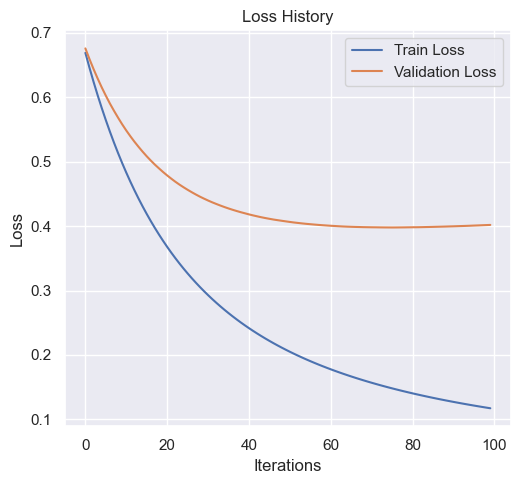

Train ROC-AUC 0.9998
Valid ROC-AUC 0.8747
Test ROC-AUC 0.8648


In [7]:
boosting = Boosting(n_estimators=100, eval_set=(X_valid, y_valid))
boosting.fit(X_train, y_train)
# boosting.plot_history(X_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

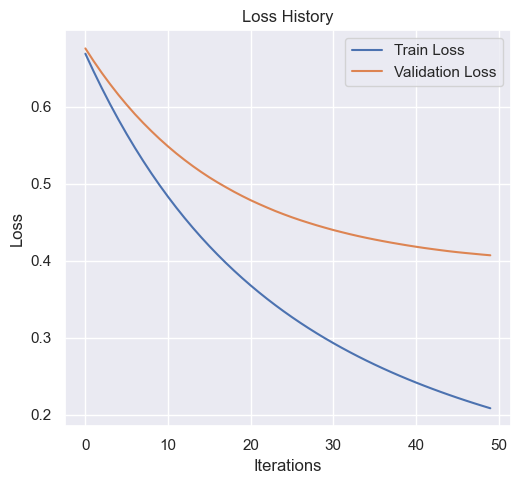

Params: {'n_estimators': 50, 'learning_rate': 0.1}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8736
Test ROC-AUC 0.8640


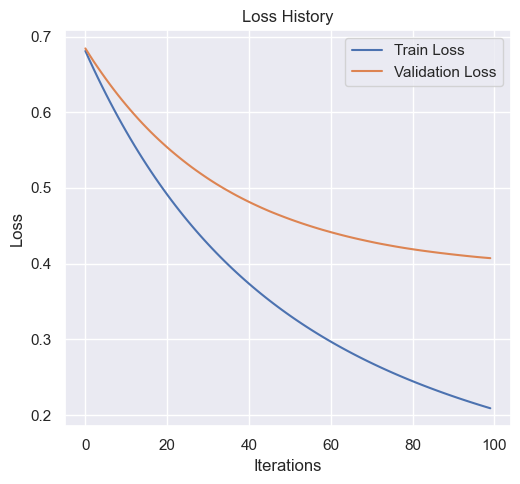

Params: {'n_estimators': 100, 'learning_rate': 0.05}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8733
Test ROC-AUC 0.8643


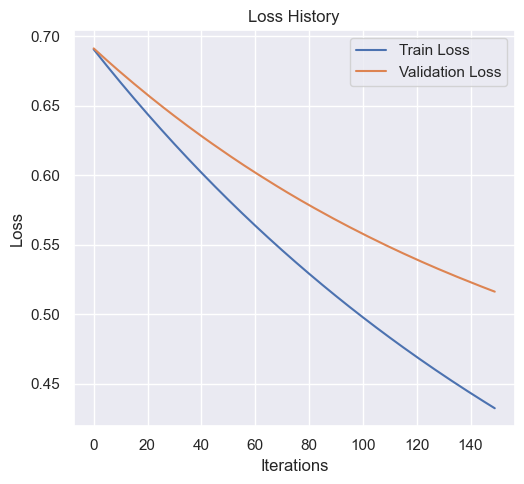

Params: {'n_estimators': 150, 'learning_rate': 0.01}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8719
Test ROC-AUC 0.8631


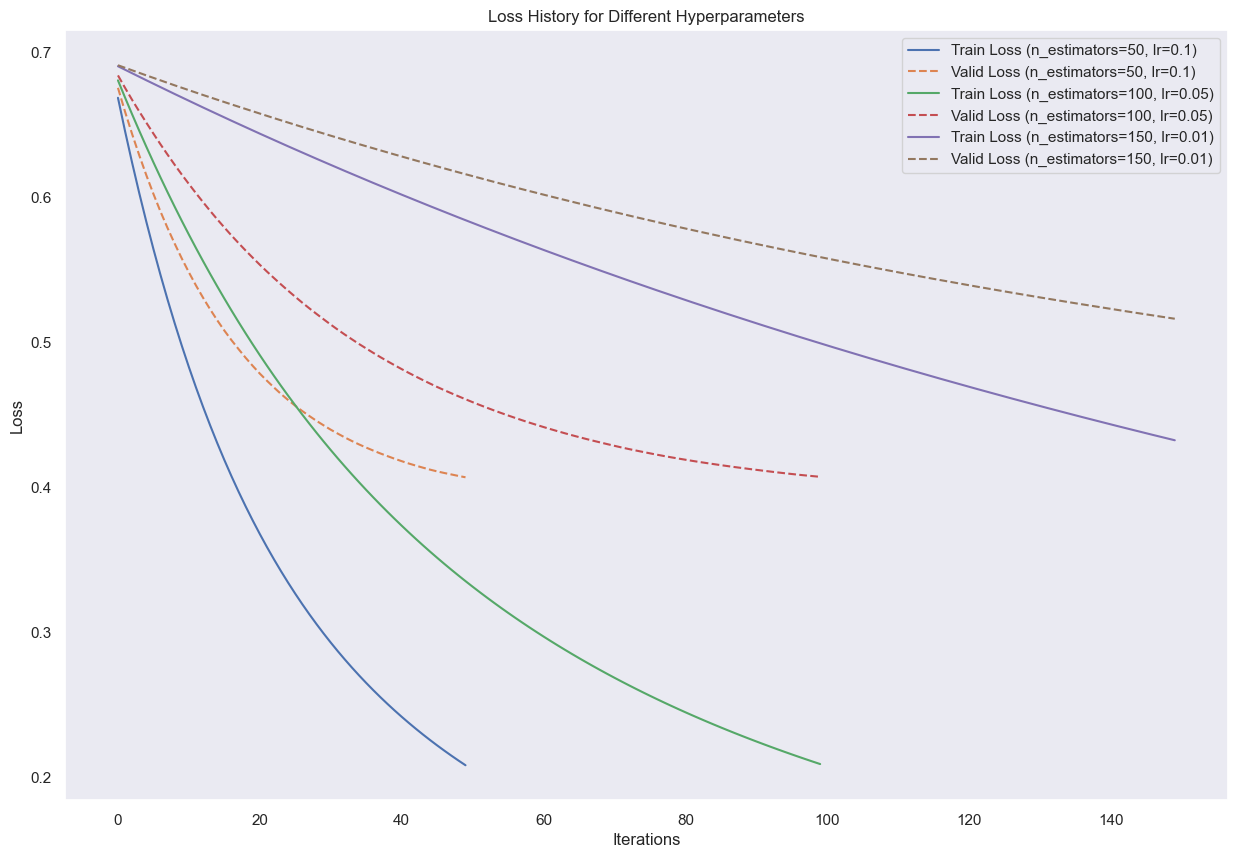

In [8]:
params_list = [
    {'n_estimators': 50, 'learning_rate': 0.1},
    {'n_estimators': 100, 'learning_rate': 0.05},
    {'n_estimators': 150, 'learning_rate': 0.01}
]

results = {}

for params in params_list:
    boosting = Boosting(
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        eval_set=(X_valid, y_valid)
    )
    boosting.fit(X_train, y_train)

    results[(params['n_estimators'], params['learning_rate'])] = boosting.history

    print(f"Params: {params}")
    print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
    print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
    print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

plt.figure(figsize=(15, 10))
for params, history in results.items():
    plt.plot(history['train_loss'], label=f'Train Loss (n_estimators={params[0]}, lr={params[1]})')
    if 'valid_loss' in history:
        plt.plot(history['valid_loss'], label=f'Valid Loss (n_estimators={params[0]}, lr={params[1]})', linestyle='--')

plt.title('Loss History for Different Hyperparameters')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

early stopping at 107


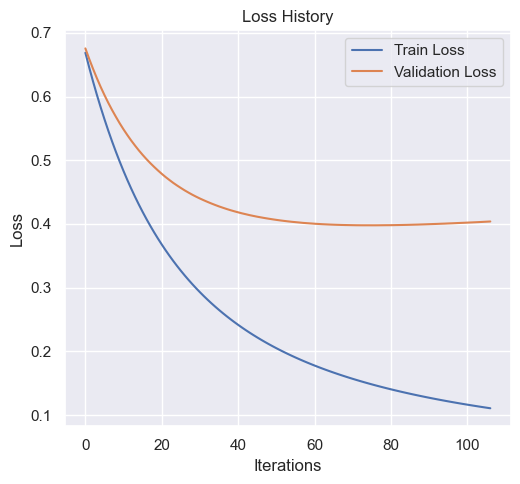

Params: {'subsample': 0.5, 'early_stopping_rounds': 30}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8751
Test ROC-AUC 0.8659
early stopping at 87


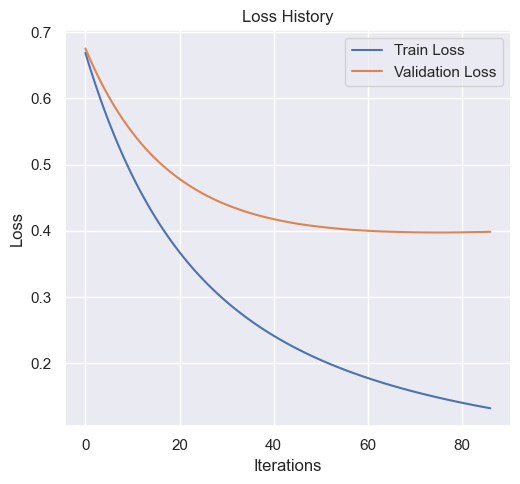

Params: {'subsample': 0.8, 'early_stopping_rounds': 10}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8751
Test ROC-AUC 0.8640
early stopping at 78


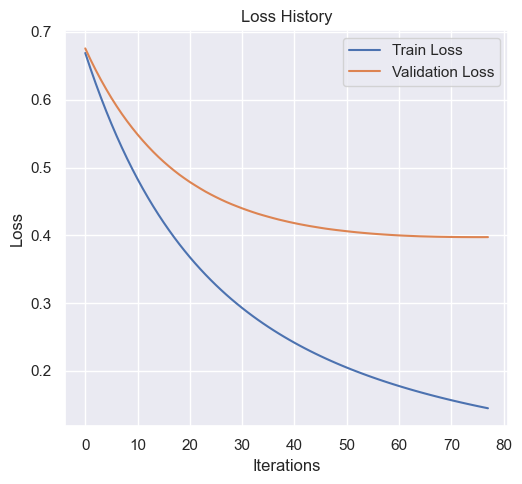

Params: {'subsample': 1.0, 'early_stopping_rounds': 1}
Train ROC-AUC 0.9998
Valid ROC-AUC 0.8746
Test ROC-AUC 0.8643


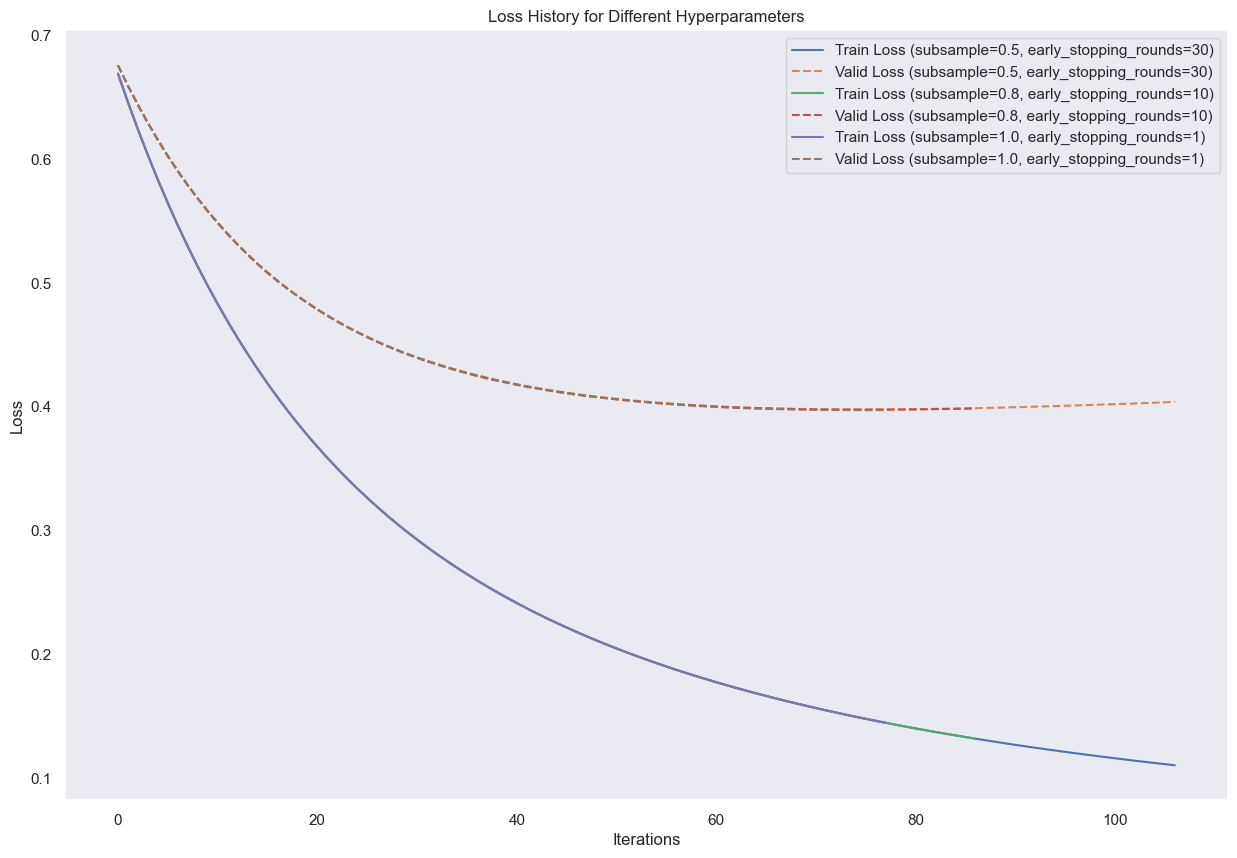

In [9]:
params_list = [
    {'subsample': 0.5, 'early_stopping_rounds':30},
    {'subsample': 0.8, 'early_stopping_rounds':10},
    {'subsample': 1.0, 'early_stopping_rounds':1}
]

results = {}

for params in params_list:
    boosting = Boosting(
        n_estimators=200,
        learning_rate=0.1,
        subsample=params['subsample'],
        eval_set=(X_valid, y_valid), 
        early_stopping_rounds = params['early_stopping_rounds']
    )
    boosting.fit(X_train, y_train)

    results[(params['subsample'],params['early_stopping_rounds'] )] = boosting.history

    print(f"Params: {params}")
    print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
    print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
    print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

plt.figure(figsize=(15, 10))
for params, history in results.items():
    plt.plot(history['train_loss'], label=f'Train Loss (subsample={params[0]}, early_stopping_rounds={params[1]})')
    if 'valid_loss' in history:
        plt.plot(history['valid_loss'], label=f'Valid Loss (subsample={params[0]}, early_stopping_rounds={params[1]})', linestyle='--')

plt.title('Loss History for Different Hyperparameters')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** ...</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

In [10]:
from xgboost import XGBClassifier
from time import time
from sklearn.metrics import log_loss

In [11]:
xgb_model = XGBClassifier(booster="gblinear", eval_metric='logloss', use_label_encoder=False)

xgb_loss_history = []
start_time = time()

for i in range(100):
    if i == 0:
        xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    else:
        xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False, xgb_model=xgb_model.get_booster())
    
    y_pred_proba_val = xgb_model.predict_proba(X_valid)[:, 1]
    loss_val = log_loss(y_valid, y_pred_proba_val)
    xgb_loss_history.append(loss_val)


xgb_training_time = time() - start_time

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
sgd_loss_history = []

start_time_sgd = time()
for _ in range(100):
    sgd_model.partial_fit(X_train, y_train, classes=np.unique(y))
    y_pred_proba_val = sgd_model.predict_proba(X_valid)[:, 1]
    loss_val = log_loss(y_valid, y_pred_proba_val)
    sgd_loss_history.append(loss_val)

sgd_training_time = time() - start_time_sgd

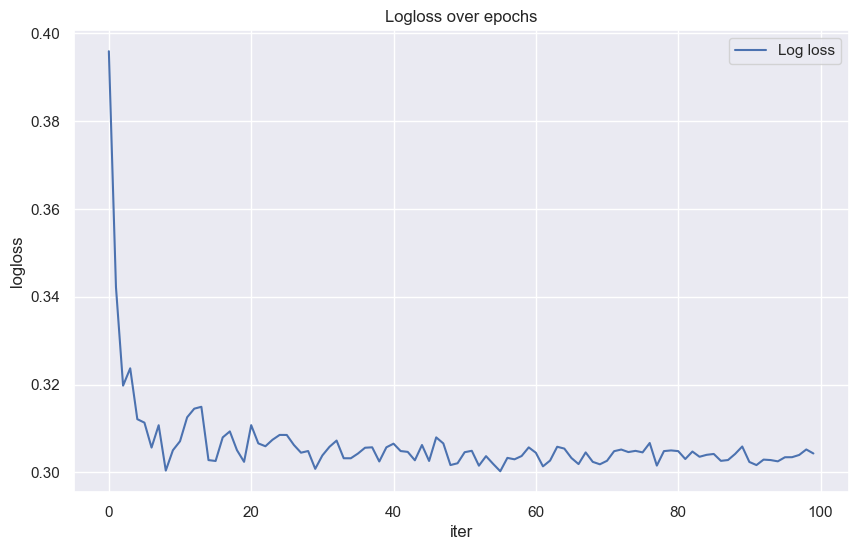

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss_history, label='Log loss')
plt.title('Logloss over epochs')
plt.xlabel('iter')
plt.ylabel('logloss')
plt.legend()
plt.grid(True)
plt.show()

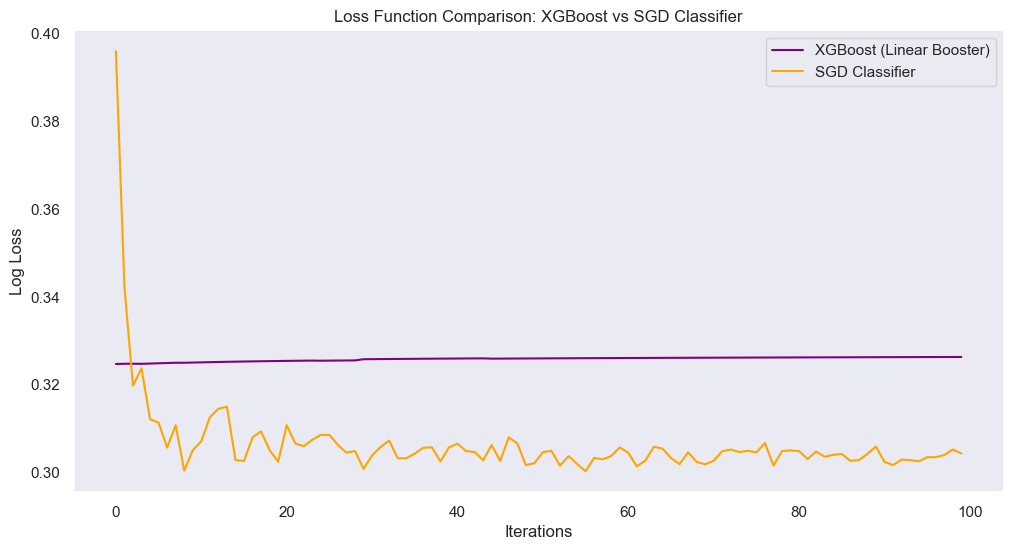

XGBoost Training Time: 6.8417 seconds
SGD Classifier Training Time: 0.2691 seconds


In [15]:
plt.figure(figsize=(12, 6))
plt.plot(xgb_loss_history, label='XGBoost (Linear Booster)', color='purple')
plt.plot(sgd_loss_history, label='SGD Classifier', color='orange')
plt.title('Loss Function Comparison: XGBoost vs SGD Classifier')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.grid()
plt.show()

print(f"XGBoost Training Time: {xgb_training_time:.4f} seconds")
print(f"SGD Classifier Training Time: {sgd_training_time:.4f} seconds")

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** 

1. Время обучения: SGD (0.2690) значительно быстрее обучается по сравнению с XGBoost (6.9614).

2. Сходимость:

   * XGBoost: обычно более стабильный и эффективный на сложных данных благодаря своей способности адаптироваться к различным паттернам.

   * SGD Classifier: может сходиться быстрее на простых задачах, но чувствителен к выбору гиперпараметров (например, скорости обучения).

3. XGBoost сильнее переобучается в сравнении с SGD Classifier
</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:**
Ответ: Бутстрап помогает таким образом:

1. когда создаем много выборок из данных, то это может помочь  оценить, насколько результаты модели стабильны и как они отклоняются от истинного значения

2. бутстрап помогает определить, насколько модель чувствительна к изменениям в данных, что указывает на риск переобучения и  помогает выявить влияние выбросов на модель.

3. бутстрап  - основа  для Bagging, которые снижают смещение и разброс за счет объединения нескольких моделей
 </font>

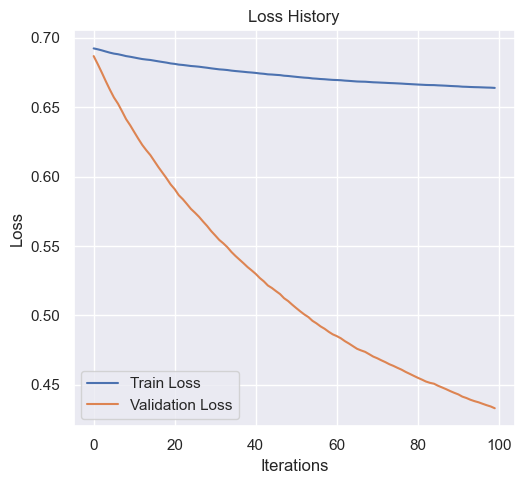

Params: {'bagging_temperature': 0.3, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.9996
Valid ROC-AUC 0.9287
Test ROC-AUC 0.9266


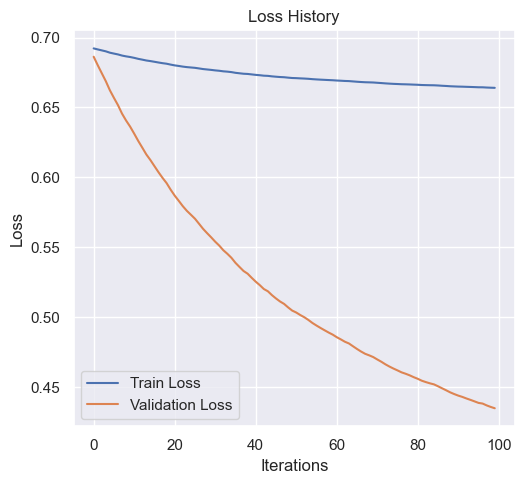

Params: {'bagging_temperature': 1, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.9991
Valid ROC-AUC 0.9303
Test ROC-AUC 0.9303


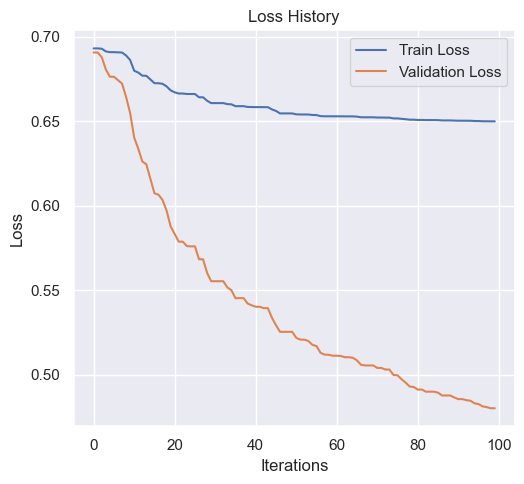

Params: {'bagging_temperature': 10, 'subsample': 0.8, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.9635
Valid ROC-AUC 0.9332
Test ROC-AUC 0.9333


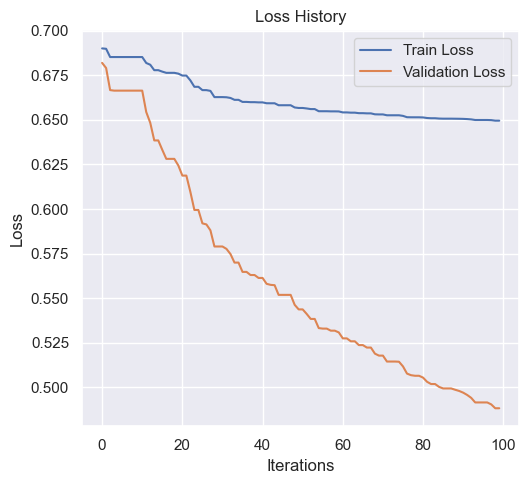

Params: {'bagging_temperature': 10, 'subsample': 1.0, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.9619
Valid ROC-AUC 0.9312
Test ROC-AUC 0.9310
early stopping at 83


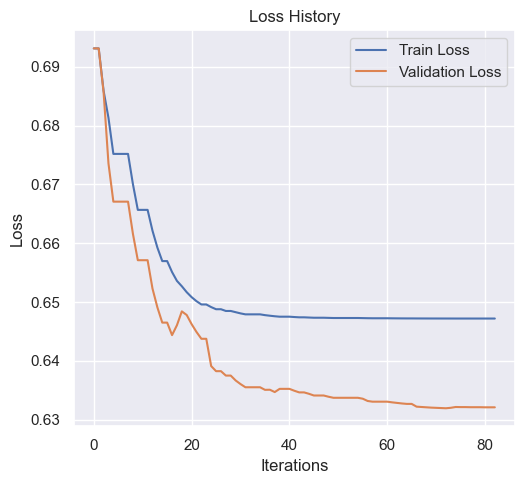

Params: {'bagging_temperature': 100, 'subsample': 1.0, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.8043
Valid ROC-AUC 0.7918
Test ROC-AUC 0.7932
early stopping at 60


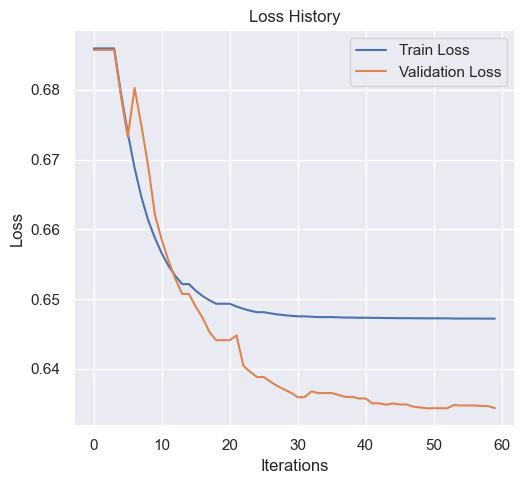

Params: {'bagging_temperature': 100, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'}
Train ROC-AUC 0.8094
Valid ROC-AUC 0.7967
Test ROC-AUC 0.8039


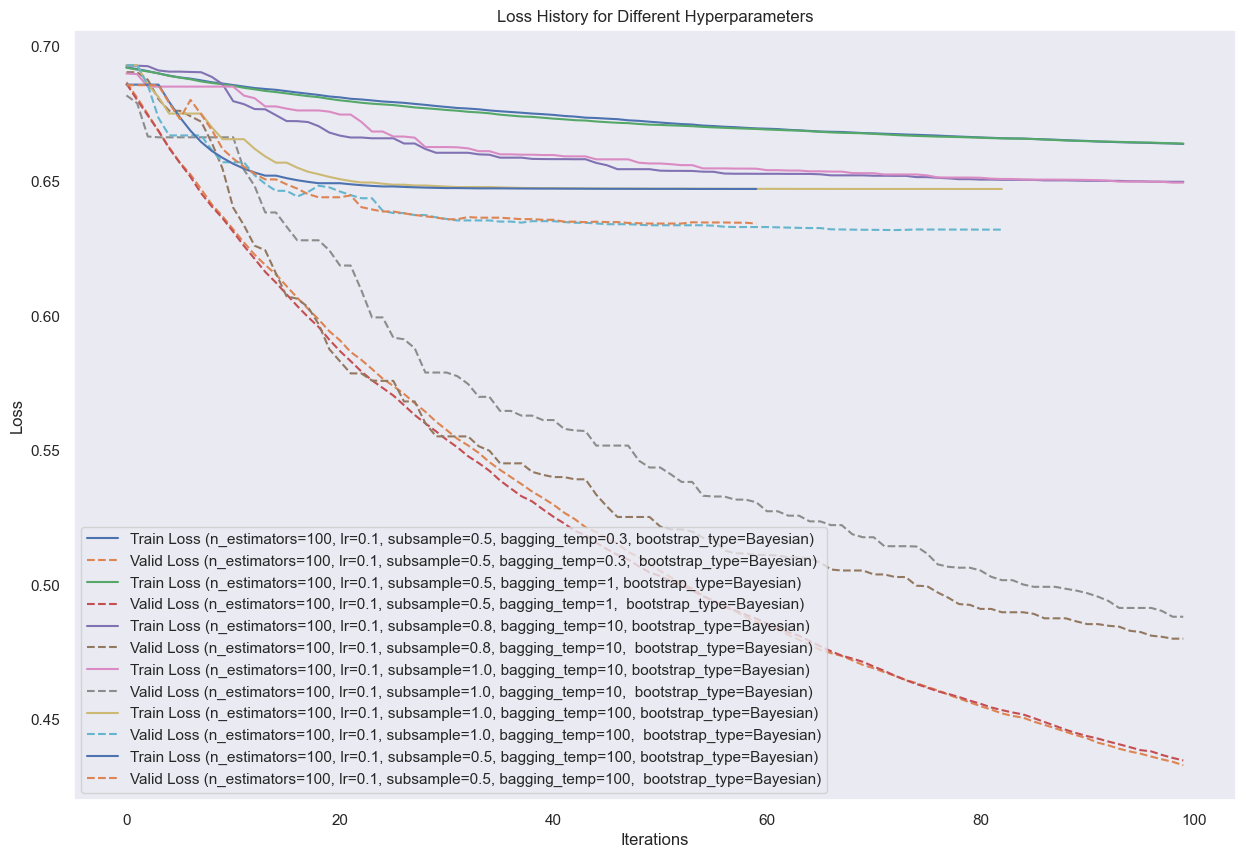

In [16]:
np.random.seed(52)

params_list = [
    {'bagging_temperature': 0.3, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'},
    {'bagging_temperature': 1, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'},
    {'bagging_temperature': 10, 'subsample': 0.8, 'bootstrap_type': 'Bayesian'},
    {'bagging_temperature': 10, 'subsample': 1.0, 'bootstrap_type': 'Bayesian'},
    {'bagging_temperature': 100, 'subsample': 1.0, 'bootstrap_type': 'Bayesian'},
    {'bagging_temperature': 100, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'},
]

results = {}

for params in params_list:
    boosting = Boosting(
        n_estimators=100,
        learning_rate=0.1,
        subsample=params['subsample'],
        early_stopping_rounds=10,
        eval_set=(X_valid, y_valid),
        bagging_temperature=params['bagging_temperature'],
        bootstrap_type=params['bootstrap_type']
    )
    boosting.fit(X_train, y_train)
    results[(100, 0.1, params['subsample'], params['bagging_temperature'], params['bootstrap_type'])] = boosting.history

    print(f"Params: {params}")
    print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
    print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
    print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

plt.figure(figsize=(15, 10))
for (n_estimators, learning_rate, subsample, bagging_temp, bootstrap_type), history in results.items():
    plt.plot(history['train_loss'], label=f'Train Loss (n_estimators={n_estimators}, lr={learning_rate}, subsample={subsample}, bagging_temp={bagging_temp}, bootstrap_type={bootstrap_type})')
    if 'valid_loss' in history:
        plt.plot(history['valid_loss'], label=f'Valid Loss (n_estimators={n_estimators}, lr={learning_rate}, subsample={subsample}, bagging_temp={bagging_temp},  bootstrap_type={bootstrap_type})', linestyle='--')

plt.title('Loss History for Different Hyperparameters')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

In [17]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: 


1. при квантизации данные делятся на дискретные интервалы, это помогает сгладить влияние выбросов: если у нас есть данные с экстремально высокими значениями, они могут быть отнесены к тому же квантилю, что и менее экстремальные значения, то есть их влияние на модель уменьшится

2. Квантизация уменьшает количество уникальных значений в наборе данных, в целом, это может сделать модель более устойчивой к шуму и выбросам, так как она будет работать с меньшим количеством значений

3. В процессе квантизации можно задать специальные правила для обработки нан-значений, например, присваивая им определённый квантиль или интервал, то есть можно будет добавить в модель отсутствующие данные без необходимости их удаления.

</font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**:
В целом, это имеет смысл, но есть нюансы. 
Если заполнять наны значениями, которые имеют смысл в контексте ваших данных (mean, mode, median), это может помочь сохранить статистические характеристики вашего набора данных, что-то рандомное, очведно, будет аффекить данные и искажать результаты.

Вообще говоря, некоторые алгоритмы, такие как деревья решений или модели на основе расстояний (например, KNN), могут интерпретировать определенные заполненные значения как аномалии. Например, если использовать очень большие или очень маленькие значения (как -1e32), это может привести к тому, что модель будет считать их выбросами и игнорировать их (короче у меня на работе была такая трабла, я перепутала в двух разных датасетах столбец широты и долготы, и при расчете расстояния хаверсина у меня все в inf улетело)

Вместо простого заполнения нанов можно использовать более сложные методы, такие как интерполяция или использование моделей для предсказания отсутствующих значений.

 </font>

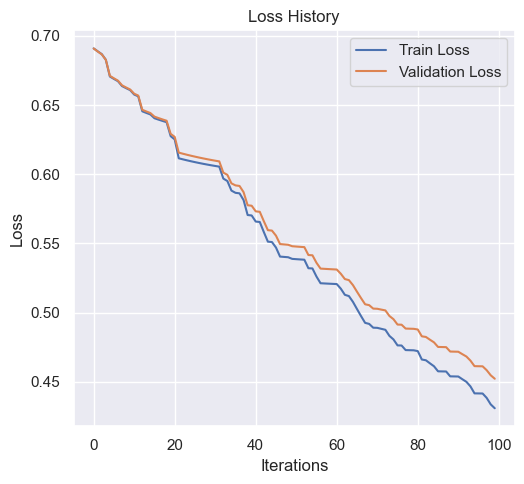

Params: {'rsm': 0.2, 'nbins': 30}
Train ROC-AUC 0.9427
Valid ROC-AUC 0.9113
Test ROC-AUC 0.9134


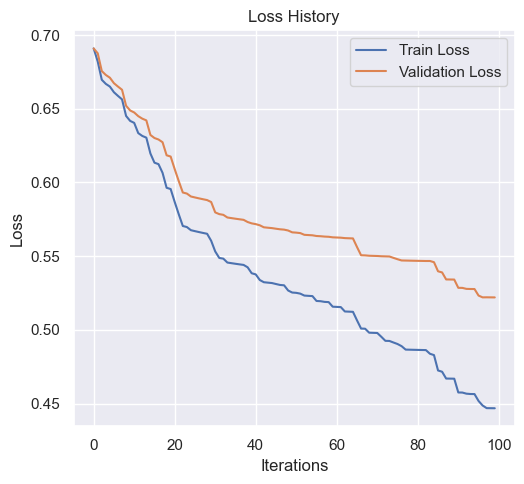

Params: {'rsm': 0.2, 'nbins': 255}
Train ROC-AUC 0.9524
Valid ROC-AUC 0.8521
Test ROC-AUC 0.8734


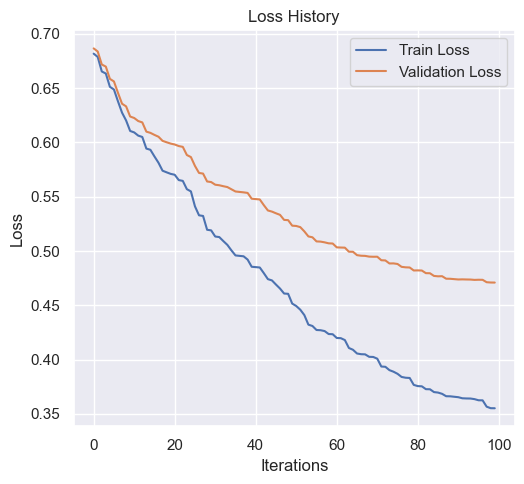

Params: {'rsm': 0.3, 'nbins': 255}
Train ROC-AUC 0.9725
Valid ROC-AUC 0.8672
Test ROC-AUC 0.8830
early stopping at 57


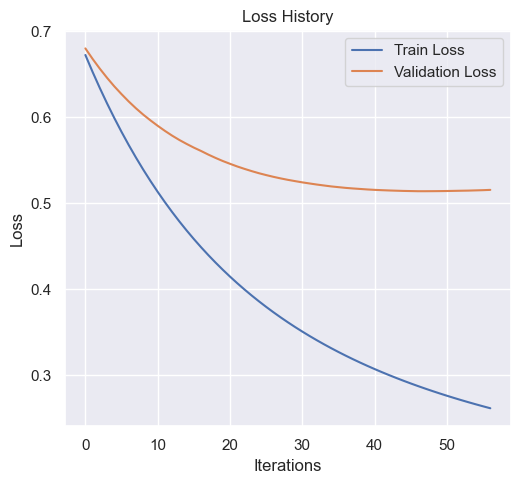

Params: {'rsm': 1, 'nbins': 255}
Train ROC-AUC 0.9892
Valid ROC-AUC 0.8011
Test ROC-AUC 0.7950


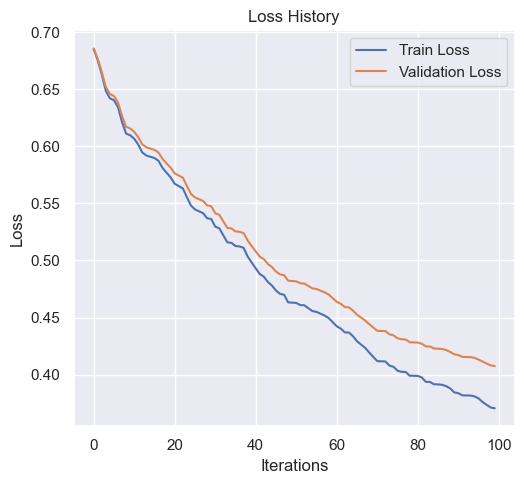

Params: {'rsm': 0.4, 'nbins': 30}
Train ROC-AUC 0.9488
Valid ROC-AUC 0.9133
Test ROC-AUC 0.9145


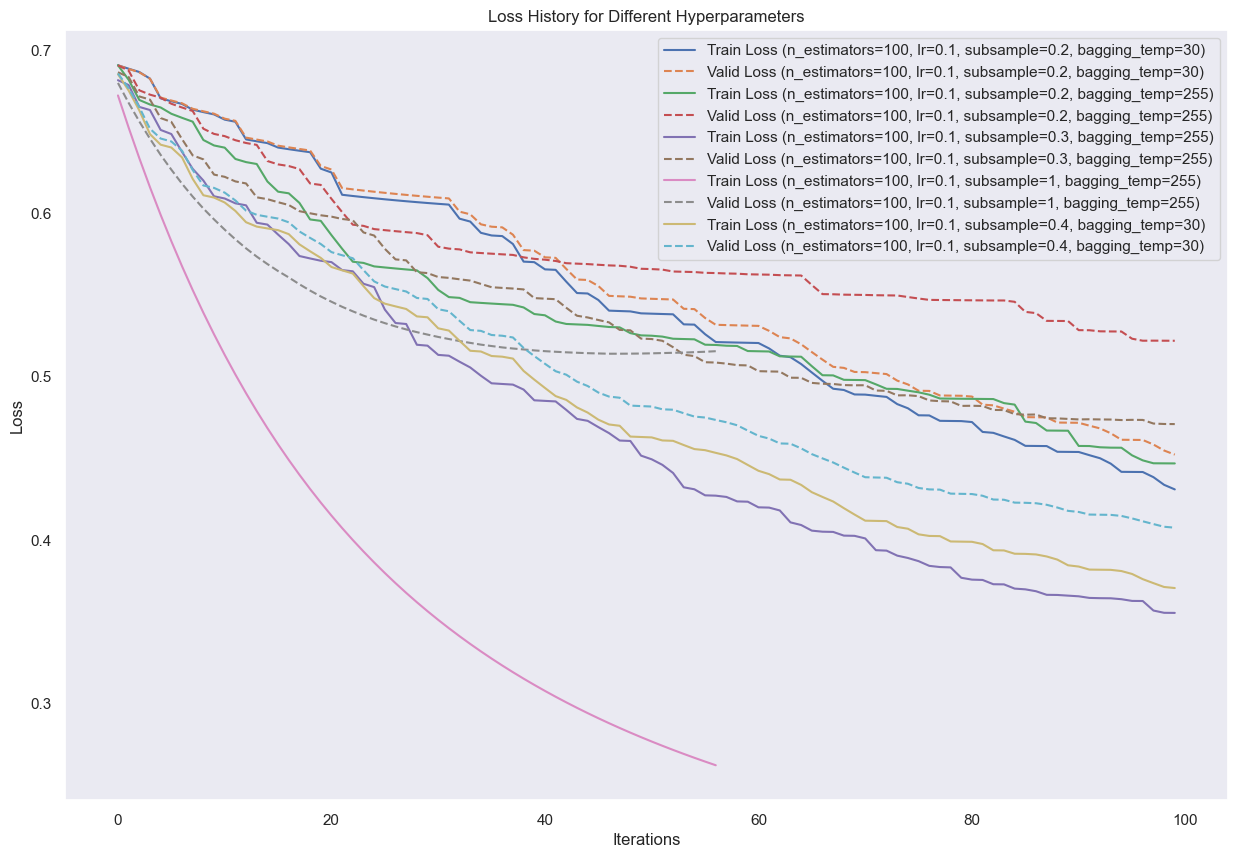

In [18]:
np.random.seed(52)

params_list = [
    {'rsm': 0.2, 'nbins': 30},
    {'rsm': 0.2, 'nbins': 255},
    {'rsm': 0.3, 'nbins': 255},
    {'rsm': 1, 'nbins': 255},
    {'rsm': 0.4, 'nbins': 30},
]

results = {}

for params in params_list:
    boosting = Boosting(
        n_estimators=100,
        learning_rate=0.1,
        early_stopping_rounds=10,
        eval_set=(X_valid, y_valid),
        rsm=params['rsm'],
        nbins=params['nbins'],
        quantization_type ='Quantile'
    )
    boosting.fit(X_train, y_train)
    results[(100, 0.1, params['rsm'], params['nbins'])] = boosting.history

    print(f"Params: {params}")
    print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
    print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
    print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

plt.figure(figsize=(15, 10))
for (n_estimators, learning_rate, subsample, bagging_temp), history in results.items():
    plt.plot(history['train_loss'], label=f'Train Loss (n_estimators={n_estimators}, lr={learning_rate}, subsample={subsample}, bagging_temp={bagging_temp})')
    if 'valid_loss' in history:
        plt.plot(history['valid_loss'], label=f'Valid Loss (n_estimators={n_estimators}, lr={learning_rate}, subsample={subsample}, bagging_temp={bagging_temp})', linestyle='--')

plt.title('Loss History for Different Hyperparameters')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [19]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

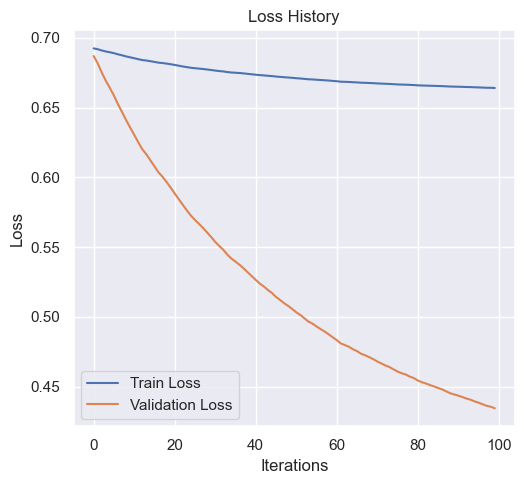

(99, 0.43462189024315606)

In [20]:
params = {'bagging_temperature': 1, 'subsample': 0.5, 'bootstrap_type': 'Bayesian'}
boosting = Boosting(
        n_estimators=100,
        learning_rate=0.1,
        subsample=params['subsample'],
        early_stopping_rounds=10,
        eval_set=(X_valid, y_valid),
        bagging_temperature=params['bagging_temperature'],
        bootstrap_type=params['bootstrap_type']
    )
boosting.fit(X_train, y_train, X_valid, y_valid)

Покажите, какие признаки оказались самыми важными

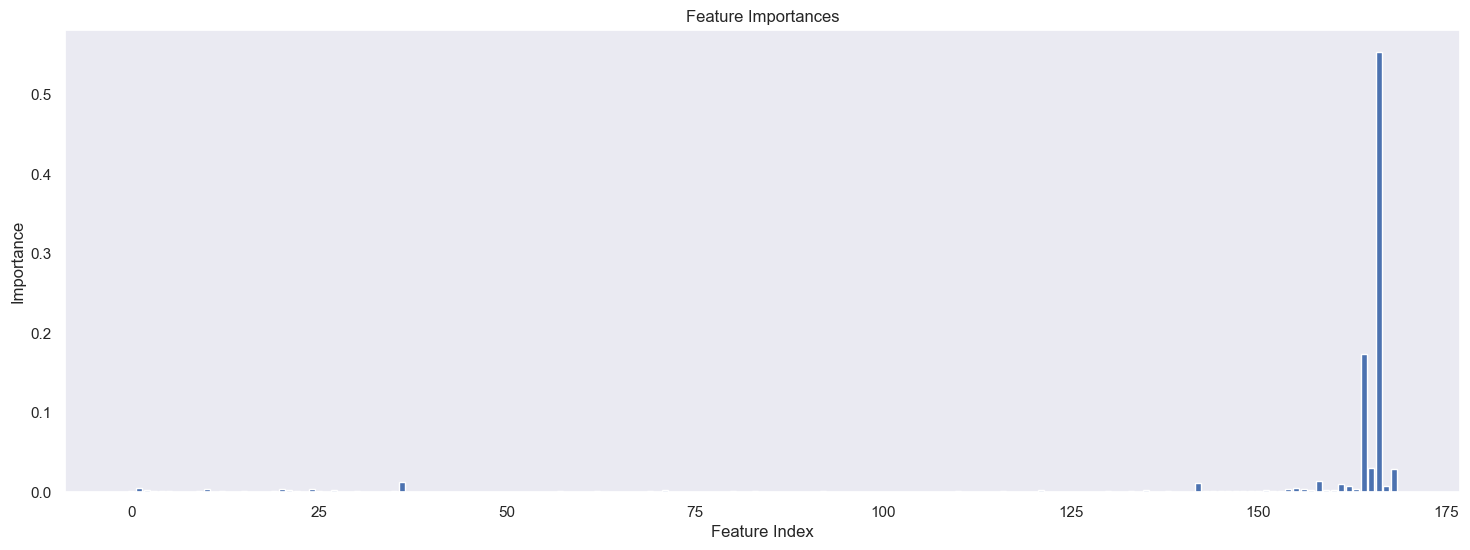

In [21]:
feature_importances = boosting.feature_importances_()
feature_indices = np.arange(feature_importances.shape[0])
plt.figure(figsize=(18, 6))
plt.bar(feature_indices, feature_importances[feature_indices], align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.grid(False)
plt.show()

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

In [22]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [23]:
import optuna
from sklearn.metrics import mean_squared_error

In [26]:
def objective(trial, x_train = X_train, y_train = y_train, x_valid = X_valid, y_valid = y_valid):
    base_model_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10),
    }

    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 20)

    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        base_model_params = base_model_params,
        eval_set=(X_valid, y_valid)
    )

    model.fit(X_train, y_train, X_valid, y_valid, plot=False)
    model_score = model.score(X_valid, y_valid)

    return model_score

np.random.seed(52)
start_time = time()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
end_time = time()
elapsed_time = end_time - start_time


print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-12-22 18:08:21,760] A new study created in memory with name: no-name-714dea39-b650-49fd-ba4a-9c307aee6e2b
[I 2024-12-22 18:08:30,542] Trial 0 finished with value: 0.9389990525473068 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 10, 'n_estimators': 169, 'learning_rate': 0.09940780150469017, 'subsample': 0.24297559102690353, 'early_stopping_rounds': 14}. Best is trial 0 with value: 0.9389990525473068.
[I 2024-12-22 18:08:32,410] Trial 1 finished with value: 0.9137937777820347 and parameters: {'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 9, 'n_estimators': 71, 'learning_rate': 0.01481117135803069, 'subsample': 0.254365278958283, 'early_stopping_rounds': 5}. Best is trial 0 with value: 0.9389990525473068.
[I 2024-12-22 18:08:35,546] Trial 2 finished with value: 0.9316090013593193 and parameters: {'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 7, 'n_estimators': 99, 'learning_rate': 0.08983979432983037, 'subsample': 0.68043

Number of finished trials:  10
Best trial:
Value:  0.9389990525473068
Params: 
    max_depth: 9
    min_samples_split: 6
    min_samples_leaf: 10
    n_estimators: 169
    learning_rate: 0.09940780150469017
    subsample: 0.24297559102690353
    early_stopping_rounds: 14


In [27]:
print(f"Время работы : {elapsed_time:.2f} seconds")

Время работы : 36.95 seconds


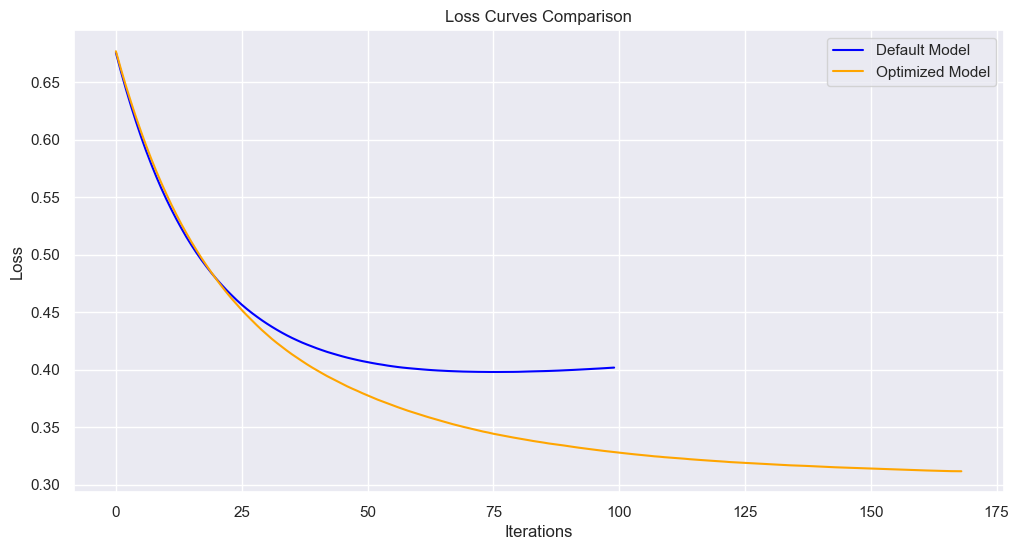

In [28]:
def plot_loss_curves(model_default, model_optimized):
    plt.figure(figsize=(12, 6))
    
    plt.plot(model_default.history['valid_loss'], label='Default Model', color='blue')
    plt.plot(model_optimized.history['valid_loss'], label='Optimized Model', color='orange')

    plt.title('Loss Curves Comparison')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


default_model = Boosting(n_estimators=100, learning_rate=0.1, eval_set=(X_valid, y_valid))
default_model.fit(X_train, y_train, X_valid, y_valid, plot = False)

best_params = trial.params
optimized_model = Boosting(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    eval_set=(X_valid, y_valid),
    base_model_params={
        "max_depth": best_params['max_depth'],
        "min_samples_split": best_params['min_samples_split'],
        "min_samples_leaf": best_params['min_samples_leaf'],
    }
)
optimized_model.fit(X_train, y_train, X_valid, y_valid, plot = False)
plot_loss_curves(default_model, optimized_model)

Дефолтная модель переобучается, а наша - нет.

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [29]:
from optuna.pruners import MedianPruner

In [31]:
def objective(trial, x_train = X_train, y_train = y_train, x_valid = X_valid, y_valid = y_valid):
    base_model_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 10),
    }

    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    subsample = trial.suggest_float("subsample", 0.1, 1.0)
    early_stopping_rounds = trial.suggest_int("early_stopping_rounds", 2, 20)

    model = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        base_model_params = base_model_params,
        eval_set=(X_valid, y_valid)
    )
    start = time()
    model.fit(X_train, y_train, X_valid, y_valid, plot=False)
    model_score = model.score(X_valid, y_valid)

    trial.set_user_attr("training_time", time() - start)
    trial.set_user_attr("final_loss", model.history['train_loss'][-1])

    return model_score

np.random.seed(52)
pruner = MedianPruner(n_startup_trials=5)
sqlite = "sqlite:///optuna_study.db"

study = optuna.create_study(
    study_name="BoostingOptimization",
    storage=sqlite,
    direction="maximize",
    load_if_exists=True,
    pruner=pruner
)

study.optimize(objective, n_trials=10)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("Value: ", trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-12-22 18:10:22,347] Using an existing study with name 'BoostingOptimization' instead of creating a new one.
[I 2024-12-22 18:10:29,714] Trial 81 finished with value: 0.9405766770192038 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2, 'n_estimators': 189, 'learning_rate': 0.087679851284519, 'subsample': 0.6921853107645068, 'early_stopping_rounds': 8}. Best is trial 72 with value: 0.9416235044894251.
[I 2024-12-22 18:10:37,250] Trial 82 finished with value: 0.9411074740208791 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 3, 'n_estimators': 175, 'learning_rate': 0.09770514850372636, 'subsample': 0.778480179012739, 'early_stopping_rounds': 11}. Best is trial 72 with value: 0.9416235044894251.
[I 2024-12-22 18:10:45,004] Trial 83 finished with value: 0.9409953281881942 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 3, 'n_estimators': 175, 'learning_rate': 0.09719965376976168, 'subsample': 0.7

Number of finished trials:  91
Best trial:
Value:  0.9416235044894251
Params: 
    max_depth: 7
    min_samples_split: 5
    min_samples_leaf: 3
    n_estimators: 194
    learning_rate: 0.09339272539293468
    subsample: 0.8272875278090656
    early_stopping_rounds: 9


### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: 
Люблю катбуст. Причины:

1. автоматически обрабатывает категориальные переменные, можно не мучиться

2. у CatBoost есть метод "Ordered Boosting", который помогает не переобучения на небольших выборках

3. у CatBoost-а очень крутой и интуитивно понятный интерфейс + куча   встроенных функций для настройки гиперпараметров и оценки модели.

4. в рамках этой задачи катбуст еще и отрабаотывает в 2 раза быстрее

</font>



In [32]:
import numpy as np
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
import time

In [33]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

start_time_xgb = time.time()
xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)
time_xgb = time.time() - start_time_xgb

[0]	validation_0-logloss:0.60835
[1]	validation_0-logloss:0.56004
[2]	validation_0-logloss:0.52052
[3]	validation_0-logloss:0.48820
[4]	validation_0-logloss:0.46169
[5]	validation_0-logloss:0.43884
[6]	validation_0-logloss:0.41976
[7]	validation_0-logloss:0.41145
[8]	validation_0-logloss:0.39766
[9]	validation_0-logloss:0.38403
[10]	validation_0-logloss:0.37194
[11]	validation_0-logloss:0.36166
[12]	validation_0-logloss:0.35315
[13]	validation_0-logloss:0.34583
[14]	validation_0-logloss:0.34091
[15]	validation_0-logloss:0.33459
[16]	validation_0-logloss:0.32952
[17]	validation_0-logloss:0.32450
[18]	validation_0-logloss:0.31991
[19]	validation_0-logloss:0.31715
[20]	validation_0-logloss:0.31381
[21]	validation_0-logloss:0.31083
[22]	validation_0-logloss:0.30890
[23]	validation_0-logloss:0.30616
[24]	validation_0-logloss:0.30470
[25]	validation_0-logloss:0.30319
[26]	validation_0-logloss:0.30168
[27]	validation_0-logloss:0.30073
[28]	validation_0-logloss:0.29890
[29]	validation_0-loglos

In [34]:
cat_params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 6,
    'loss_function': 'Logloss',
    'early_stopping_rounds': 10,
    'random_seed': 42,
    'verbose': False
}

start_time_cat = time.time()
cat_model = cb.CatBoostClassifier(**cat_params)
cat_model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)
time_cat = time.time() - start_time_cat

In [35]:
xgb_train_preds = xgb_model.predict(X_train)
xgb_val_preds = xgb_model.predict(X_valid)

xgb_train_loss = log_loss(y_train, xgb_train_preds)
xgb_val_loss = log_loss(y_valid, xgb_val_preds)

cat_train_preds = cat_model.predict(X_train)
cat_val_preds = cat_model.predict(X_valid)
cat_train_loss = log_loss(y_train, cat_train_preds)
cat_val_loss = log_loss(y_valid, cat_val_preds)

print(f"XGBoost Time: {time_xgb:.4f} seconds")
print(f"CatBoost Time: {time_cat:.4f} seconds")

print(f"XGBoost Train Log Loss: {xgb_train_loss:.4f}, Validation Log Loss: {xgb_val_loss:.4f}")
print(f"CatBoost Train Log Loss: {cat_train_loss:.4f}, Validation Log Loss: {cat_val_loss:.4f}")

XGBoost Time: 0.3669 seconds
CatBoost Time: 0.3177 seconds
XGBoost Train Log Loss: 2.5676, Validation Log Loss: 4.3485
CatBoost Train Log Loss: 3.0730, Validation Log Loss: 4.3485


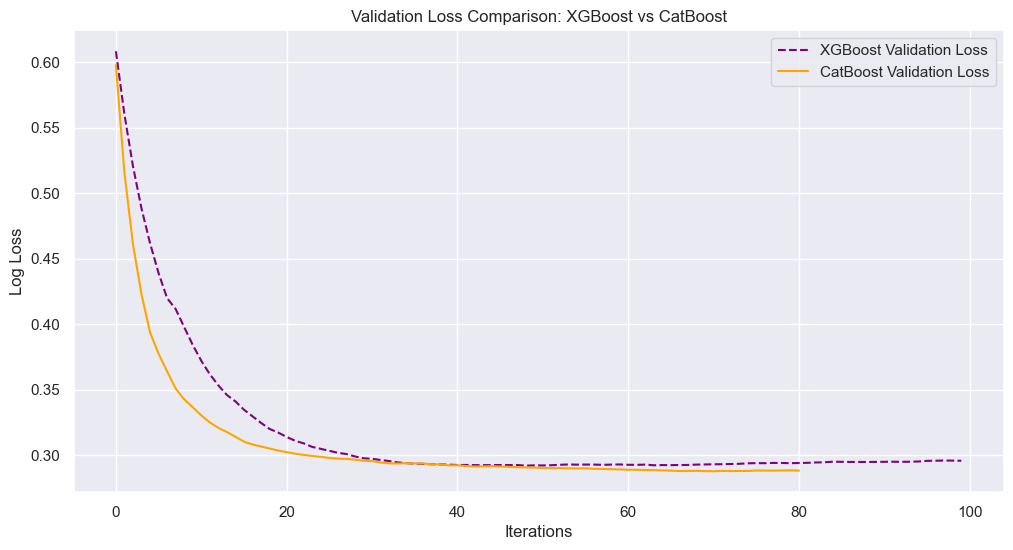

In [36]:
xgb_evals = xgb_model.evals_result() 
xgb_validation_loss = xgb_evals['validation_0']['logloss']

cat_val_preds = cat_model.get_evals_result() 
cat_validation_loss = cat_val_preds['validation']['Logloss']

plt.figure(figsize=(12, 6))
plt.plot(xgb_validation_loss, label='XGBoost Validation Loss', color='purple', linestyle='--')
plt.plot(cat_validation_loss, label='CatBoost Validation Loss', color='orange')
plt.title('Validation Loss Comparison: XGBoost vs CatBoost')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [ ]:
# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

In [37]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

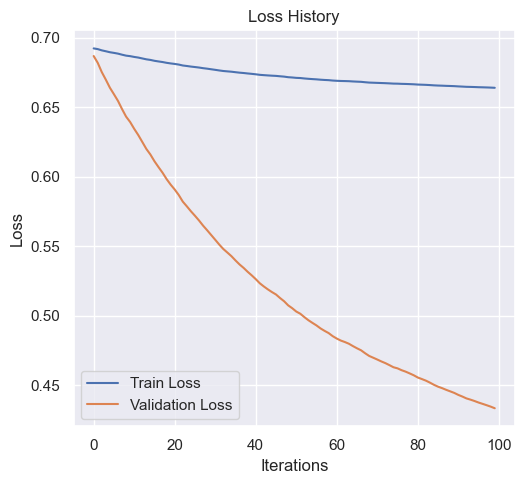

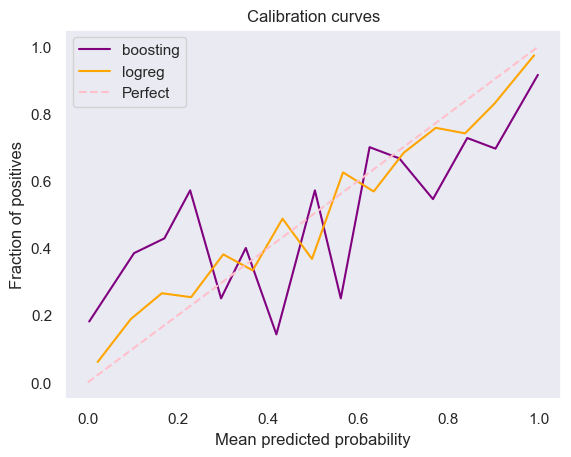

In [39]:
boosting = Boosting(
        n_estimators=100,
        learning_rate=0.1,
        subsample=params['subsample'],
        early_stopping_rounds=10,
        eval_set=(X_valid, y_valid),
        bagging_temperature=params['bagging_temperature'],
        bootstrap_type=params['bootstrap_type']
    )
boosting.fit(X_train, y_train, X_valid, y_valid)

bpreds = boosting.predict_proba(X_test)[:, 1]
logregpreds = model.predict_proba(X_test)[:, 1]

btrues, bpreds = calibration_curve(y_test, bpreds, n_bins=15)
logregtrues, logregpreds = calibration_curve(y_test, logregpreds, n_bins=15)

plt.plot(bpreds, btrues, label='boosting', color='purple')
plt.plot(logregpreds, logregtrues, label='logreg', color='orange')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='pink')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.grid(False)
plt.show()


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

Получилось так, что бустинг работает хуже, чем логрег.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

![кратиеочка](https://i.ibb.co/XpTLHC8/photo-2024-12-22-17-34-00.jpg)

еще артемка кайф:


![артемка](https://i.ibb.co/R06wL5v/photo-2024-12-22-17-34-05.jpg)

ПАША С НОВЫМ ГОДОМ!!!!!!

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚